In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.models import load_model
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Sequential
import scipy

# 1 Set GPU limits

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

gpu2=  tf.config.list_physical_devices('GPU')
print(gpu2)



[]


# 2 load Data

In [46]:
train_path = "DATA/TRAIN/"
test_path = "DATA/TEST/"


categories = os.listdir(train_path)
categories
num_classes = 2



data = []
labels = []

for category in categories:
    folder_path = os.path.join(train_path, category)
    files_path = os.listdir(folder_path)
    for file in files_path:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        label = file_path.split("/")[-2]
        data.append(img)
        labels.append(label)
        
len(data), len(labels)


df = pd.DataFrame({"image": data, "label": labels})
df["label"].value_counts()




label
TRAIN    22564
Name: count, dtype: int64

# 3 Build Deep Learning model

In [47]:


from keras.src.layers import Activation

#binaryV3   new Dense ,more dropout,change batch size from 32 to 256
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))
model.compile('adam',  loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


import scipy


# 4 Create Generators


In [48]:
data_gen = ImageDataGenerator(rescale=1./255, fill_mode='reflect')
val_gen = ImageDataGenerator(rescale=1./255)

train_generator = data_gen.flow_from_directory(train_path, target_size=(150,150), batch_size=32)
validation_generator = val_gen.flow_from_directory(test_path, target_size=(150,150), batch_size=32)


# train_datagen = ImageDataGenerator(
#     # rescale=1./255,
# )
# 
# train_generator = train_datagen.flow_from_directory(
#     train_path,
#     target_size=(224, 224),
#     batch_size=128,
# )
# 
# validation_datagen = ImageDataGenerator(
#     # rescale=1./255
# )
# 
# validation_generator = validation_datagen.flow_from_directory(
#     test_path, 
#         target_size= (224,224),
#         batch_size = 128)
# # )


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


# 5 Train Model

In [49]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator, 
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=6
)

Epoch 1/6
705/705 [==============================] - 205s 289ms/step - loss: 0.4580 - accuracy: 0.8061 - val_loss: 0.3674 - val_accuracy: 0.8377
Epoch 2/6
705/705 [==============================] - 205s 290ms/step - loss: 0.3870 - accuracy: 0.8420 - val_loss: 0.3266 - val_accuracy: 0.8746
Epoch 3/6
705/705 [==============================] - 203s 288ms/step - loss: 0.3497 - accuracy: 0.8632 - val_loss: 0.2971 - val_accuracy: 0.8810
Epoch 4/6
705/705 [==============================] - 192s 273ms/step - loss: 0.3253 - accuracy: 0.8729 - val_loss: 0.3739 - val_accuracy: 0.8494
Epoch 5/6
705/705 [==============================] - 190s 269ms/step - loss: 0.2963 - accuracy: 0.8831 - val_loss: 0.2754 - val_accuracy: 0.8866
Epoch 6/6
705/705 [==============================] - 188s 266ms/step - loss: 0.2774 - accuracy: 0.8930 - val_loss: 0.3194 - val_accuracy: 0.8634


# 6 Show Results

In [40]:


history_df = pd.DataFrame(history.history)
history_df.head()



,loss,accuracy,val_loss,val_accuracy
0,0.445214,0.812533,0.426899,0.800481
1,0.370360,0.851278,0.274110,0.885016
2,0.347879,0.863128,0.282829,0.901843
3,0.318976,0.873691,0.253667,0.912660
4,0.294417,0.885585,0.249544,0.922676


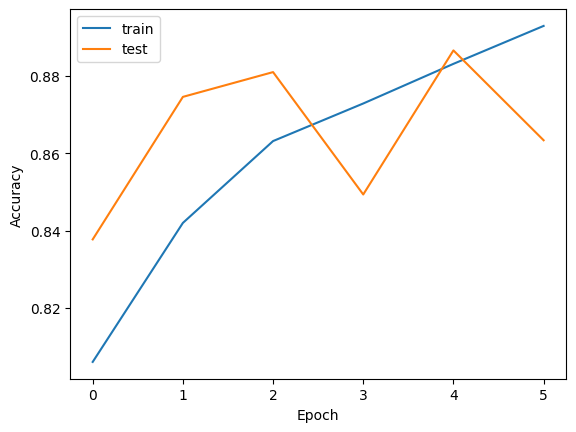

In [50]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"])
plt.show()



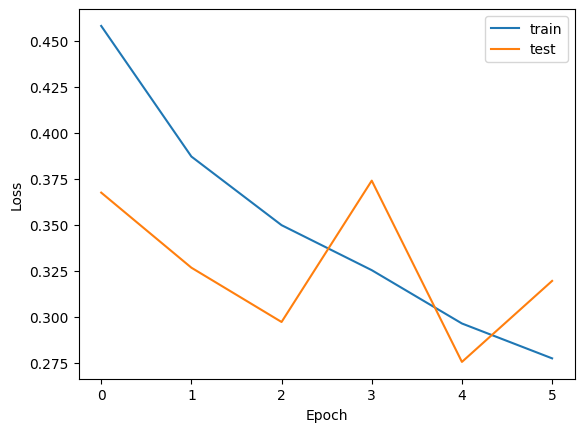

In [51]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"])
plt.show()

1/1 [==============================] - 0s 70ms/step


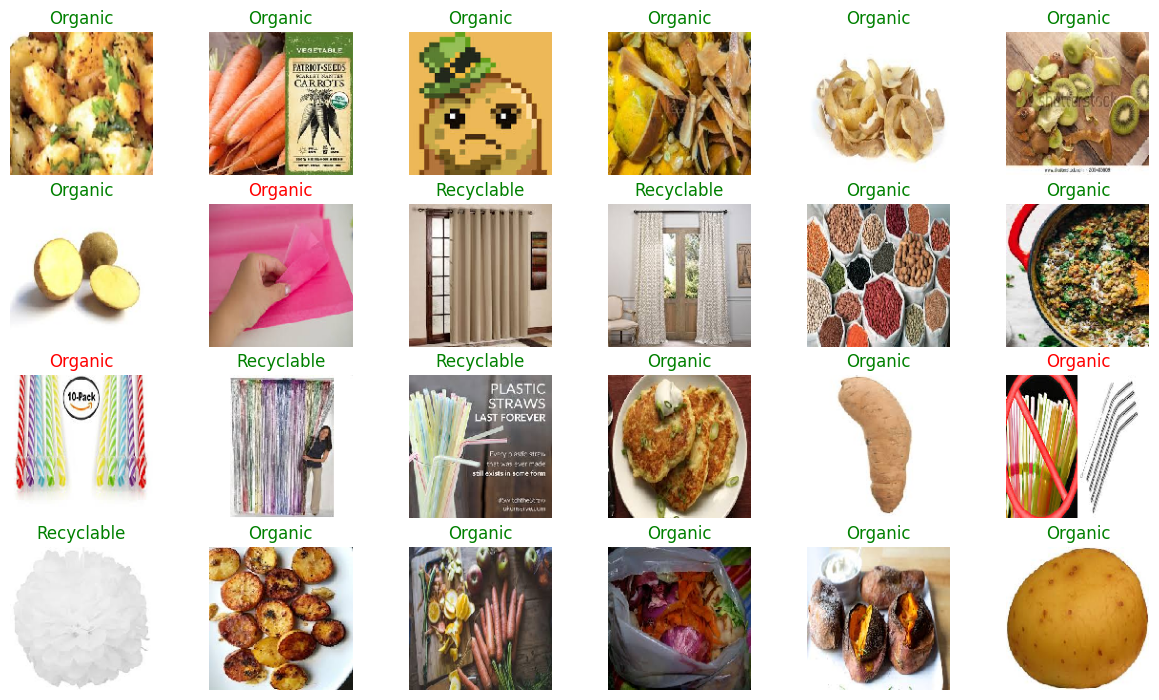

In [56]:


img, _= next(validation_generator)
plt.figure(figsize=(15, 13))
result = model.predict(img)
for i in range(24):
    ax = plt.subplot(6, 6, i + 1)
    plt.imshow(img[i])
    if result[i][1] < 0.5:
        pred = 0
        if pred == _[i][1]:
            plt.title("Organic", color='green')
        else: 
            plt.title("Organic", color='red')
    else:
        pred = 1
        if pred == _[i][1]:
            plt.title("Recyclable", color='green')
        else: 
            plt.title("Recyclable", color='red')
    plt.axis("off")



In [52]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

79/79 [==============================] - 5s 58ms/step - loss: 0.3203 - accuracy: 0.8627
Test accuracy: 0.8627138733863831


# 7 One image test

1/1 [==============================] - 0s 271ms/step
Raw prediction output: 0.9064270257949829
This image -> Organic


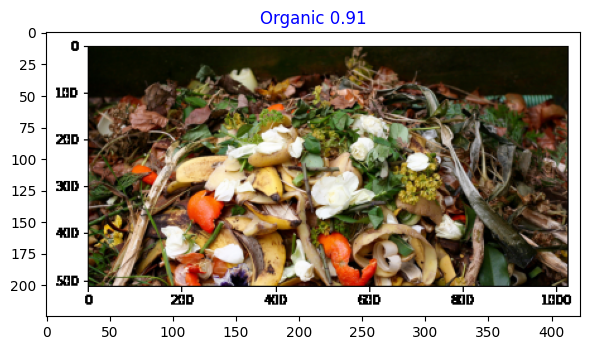

In [39]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img


def predict_single_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)

    # Predict the class
    result = model.predict(img)[0][0]
    print(f"Raw prediction output: {result}")

    # Display the image with prediction result
    plt.figure(figsize=(6, 4))
    img_display = load_img(image_path)  # Load the image for display
    plt.imshow(img_display)
    plt.tight_layout()
    if result < 0.5:
        plt.title(f"Recyclable {'{:.2f}'.format(result)}", color='blue')
        print("\033[94m" + "This image -> Recyclable" + "\033[0m")
    else:
        plt.title(f"Organic {'{:.2f}'.format(result)}", color='blue')
        print("\033[94m" + "This image -> Organic" + "\033[0m")
    plt.show()


predict_single_image('001.png')

# 8 saving/loading model


In [45]:
model.save(os.path.join('models','binaryV4_6e.h5'))

C:\Users\Dominik\Desktop\projekty\biai\pythonProject\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model = load_model(os.path.join('models','categoricalV1_3e.h5'))